In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std


#### Data

Data obtained from FBI Uniform Crime Reporting on crimes in New York state in 2012.

link: https://ucr.fbi.gov/crime-in-the-u.s/2012/crime-in-the-u.s.-2012/tables/8tabledatadecpdf/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_by_new_york_by_city_2012.xls

In [2]:
# Import data
raw_data = pd.read_csv("New_York_Offenses_2012.csv", header = 4)

#Create working copy of dat
data= raw_data

#Last three rows aren't relevant data, drop them.
data.drop(data.tail(7).index,inplace=True) 

In [3]:
#See columns
data.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter', 'Forcible\nrape', 'Robbery',
       'Aggravated\nassault', 'Property\ncrime', 'Burglary', 'Larceny-\ntheft',
       'Motor\nvehicle\ntheft', 'Arson2', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [4]:
data.tail()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Forcible rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson2,Unnamed: 12,Unnamed: 13
332,Westhampton Beach Village,"1,737",2,0.0,0,0,2,57,12,44,1,0.0,NaN,NaN
333,West Seneca Town,"44,902",52,0.0,2,13,37,842,149,663,30,6.0,NaN,NaN
334,Whitehall Village,"2,626",8,0.0,2,1,5,73,23,49,1,NaN,NaN,NaN
335,White Plains,"57,567",92,1.0,3,31,57,"1,386",82,"1,279",25,NaN,NaN,NaN
336,Whitesboro Village,"3,784",7,0.0,0,0,7,31,9,20,2,0.0,NaN,NaN


In [6]:
#Further clean the data
data['Population'] = data['Population'].str.replace(',', '')
data['Forcible\nrape'] = data['Forcible\nrape'].str.replace(',', '')
data['Property\ncrime'] = data['Property\ncrime'].str.replace(',', '')
data['Property\ncrime'] = pd.to_numeric(data['Property\ncrime'])
data['Population'] = pd.to_numeric(data['Population'])
data['Forcible\nrape'] = pd.to_numeric(data['Forcible\nrape'])
data.describe()

,Population,Murder and nonnegligent manslaughter,Forcible rape,Property crime,Arson2,Unnamed: 12,Unnamed: 13
count,3.370000e+02,337.000000,337.000000,337.000000,181.000000,0.0,0.0
mean,4.019026e+04,1.786350,6.433234,836.281899,4.359116,NaN,NaN
std,4.514309e+05,23.061423,64.131532,7834.422626,26.775575,NaN,NaN
min,5.130000e+02,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,2.958000e+03,0.000000,0.000000,40.000000,0.000000,NaN,NaN
50%,7.415000e+03,0.000000,0.000000,122.000000,0.000000,NaN,NaN
75%,1.897800e+04,0.000000,2.000000,351.000000,1.000000,NaN,NaN
max,8.289415e+06,419.000000,1162.000000,142760.000000,294.000000,NaN,NaN


In [7]:
#Rename columns being used for analysis
data.rename(columns={"Murder and\nnonnegligent\nmanslaughter":"Murder",'Forcible\nrape':"Rape","Property\ncrime":"Property_Crime"},inplace=True)

In [8]:
data.describe()

,Population,Murder,Rape,Property_Crime,Arson2,Unnamed: 12,Unnamed: 13
count,3.370000e+02,337.000000,337.000000,337.000000,181.000000,0.0,0.0
mean,4.019026e+04,1.786350,6.433234,836.281899,4.359116,NaN,NaN
std,4.514309e+05,23.061423,64.131532,7834.422626,26.775575,NaN,NaN
min,5.130000e+02,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,2.958000e+03,0.000000,0.000000,40.000000,0.000000,NaN,NaN
50%,7.415000e+03,0.000000,0.000000,122.000000,0.000000,NaN,NaN
75%,1.897800e+04,0.000000,2.000000,351.000000,1.000000,NaN,NaN
max,8.289415e+06,419.000000,1162.000000,142760.000000,294.000000,NaN,NaN


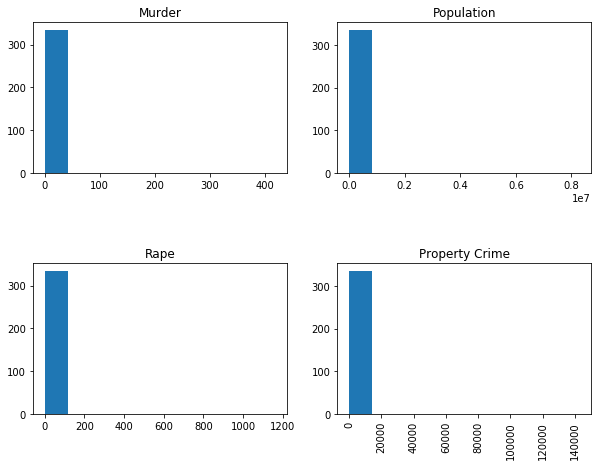

In [47]:
#histograms of metrics to be used

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
murder = data.Murder
plt.hist(murder, bins=10)
plt.title("Murder")


plt.subplot(2,2,2)
population = data.Population
plt.hist(population, bins=10)
plt.title("Population")


plt.subplot(2,2,3)
rape = data.Rape
plt.hist(rape, bins=10)
plt.title("Rape")

plt.subplot(2,2,4)
property_crime = data.Property_Crime
plt.hist(property_crime, bins=10)
plt.title("Property Crime")
plt.subplots_adjust(bottom = .2 , wspace = .2, hspace = .6)
plt.xticks(rotation ="vertical")
plt.show()


In [9]:
data.describe()

,Population,Murder,Rape,Property_Crime,Arson2,Unnamed: 12,Unnamed: 13
count,3.370000e+02,337.000000,337.000000,337.000000,181.000000,0.0,0.0
mean,4.019026e+04,1.786350,6.433234,836.281899,4.359116,NaN,NaN
std,4.514309e+05,23.061423,64.131532,7834.422626,26.775575,NaN,NaN
min,5.130000e+02,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,2.958000e+03,0.000000,0.000000,40.000000,0.000000,NaN,NaN
50%,7.415000e+03,0.000000,0.000000,122.000000,0.000000,NaN,NaN
75%,1.897800e+04,0.000000,2.000000,351.000000,1.000000,NaN,NaN
max,8.289415e+06,419.000000,1162.000000,142760.000000,294.000000,NaN,NaN


In [13]:
analysis_data = data[["City","Population","Murder","Rape","Property_Crime","Arson2"]]


In [14]:
analysis_data.describe()

,Population,Murder,Rape,Property_Crime,Arson2
count,3.370000e+02,337.000000,337.000000,337.000000,181.000000
mean,4.019026e+04,1.786350,6.433234,836.281899,4.359116
std,4.514309e+05,23.061423,64.131532,7834.422626,26.775575
min,5.130000e+02,0.000000,0.000000,0.000000,0.000000
25%,2.958000e+03,0.000000,0.000000,40.000000,0.000000
50%,7.415000e+03,0.000000,0.000000,122.000000,0.000000
75%,1.897800e+04,0.000000,2.000000,351.000000,1.000000
max,8.289415e+06,419.000000,1162.000000,142760.000000,294.000000


In [15]:
analysis_data= analysis_data.dropna()

In [16]:
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 336
Data columns (total 6 columns):
City              181 non-null object
Population        181 non-null int64
Murder            181 non-null float64
Rape              181 non-null int64
Property_Crime    181 non-null int64
Arson2            181 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 9.9+ KB


In [19]:
analysis_data["population_squared"] = analysis_data["Population"] **2 
analysis_data["Murder"] = np.where(analysis_data.Murder >= 1, 1,0)
analysis_data["Rape"] = np.where(analysis_data.Rape >=1,1,0)
analysis_data["Arson"] = np.where(analysis_data.Arson2 >=1,1,0)


In [20]:
analysis_data.head()

,City,Population,Murder,Rape,Property_Crime,Arson2,population_squared,Arson
0,Adams Village,1811,0,0,8,0.0,3279721,0
1,Addison Town and Village,2611,0,0,43,0.0,6817321,0
2,Akron Village,2880,0,0,25,0.0,8294400,0
6,Allegany Village,1814,0,0,32,0.0,3290596,0
8,Amherst Town,117591,0,1,2261,4.0,13827643281,1


In [21]:
# Create model and show results
regr = linear_model.LinearRegression()
Y = analysis_data["Property_Crime"].values.reshape(-1,1)
X = analysis_data[["Murder","Rape","population_squared"]]
regr.fit(X,Y)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  4.87415699e+02   3.00700486e+02   2.01617514e-07]]

Intercept: 
 [ 50.23069895]

R-squared:
0.951387119332


Using the three variables suggested produced a strong R-squared, so at this point I will leave the model alone.  Most of the predictive power appears to come from population squared.  When that is taken out the R-squared drops dramatically.  Adding Murder and Rape serves to only increase it a small amount.

In [42]:
linear_formula = "Property_Crime ~ Murder+Rape+population_squared+Arson"
lm = smf.ols(formula=linear_formula, data=analysis_data).fit()

In [43]:
lm.params


Intercept             2.183800e+01
Murder                4.711771e+02
Rape                  1.784500e+02
population_squared    2.002789e-07
Arson                 2.174765e+02
dtype: float64

In [44]:
lm.rsquared

0.95469612171100959

In [45]:
lm.pvalues

Intercept              4.662185e-01
Murder                 1.962269e-07
Rape                   4.660791e-03
population_squared    4.299427e-107
Arson                  4.357539e-04
dtype: float64

In [46]:
lm.conf_int()

,0,1
Intercept,-3.718155e+01,8.085755e+01
Murder,2.995385e+02,6.428157e+02
Rape,5.557845e+01,3.013216e+02
population_squared,1.924995e-07,2.080584e-07
Arson,9.776943e+01,3.371836e+02


All of the existing paramaters were significant so I kept them.  I added arson and it was significant as well so I kept that in my final model.